In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.drop(['CustomerID'],axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [55]:
X = data[['Age','Annual Income (k$)','Spending Score (1-100)']]
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

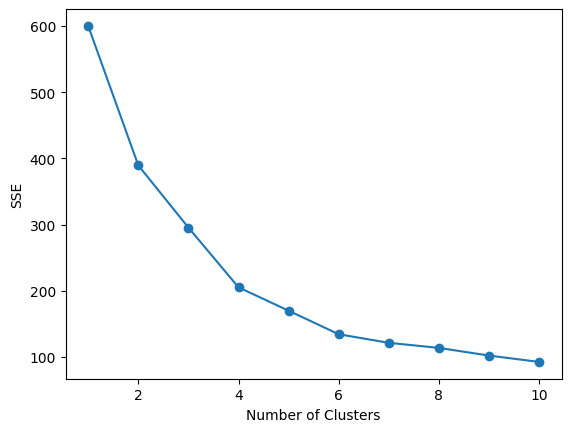

In [68]:
sse = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [63]:
model = KMeans(n_clusters=6,random_state=42)
cluster = model.fit_predict(X_scaled)

In [65]:
data['cluster'] = cluster
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,4
197,Male,32,126,74,1
198,Male,32,137,18,4


In [67]:
print(f"Silhoutte score:{silhouette_score(X_scaled,cluster)}")

Silhoutte score:0.43106526216603014
